_______________________________________________________________________________
***Progetto Data Mining***

# About Dataset

## Content
Questo dataset contiene circa 10 anni di osservazioni meteo gornaliere da tutta l'Australia. Contiene in particolare dati sulle giornate di pioggia e di sole di tutto il paese. Contiene 23 colonne.

* Date: la data dell'osservazione
* Location: il luogo della stazione meteo
* MinTemp: temperatura minima
* MaxTemp: temperatura massima
* Rainfall: il quantitativo di pioggia caduta registrata in mm
* Evaporation: Dato sull'evaporazione in mm
* Sunshine: Numero di ore di luce nel giorno
* WindGustDir: Direzione della folata di vento più forte
* WindGustSpeed: Velocità della folata di vento più forte
* WindGust3Dir: Direzione del vento alle 3
* WindGust9Dir: Direzione del vento alle 9
* WindSpeed9am: Velocità del vento alle 9
* WindSpeed3am: Velocità del vento alle 3
* Humidity3pm: Umidità alle 3
* Humidity9pm: Umidità alle 9
* Pressure9am: Pressione atmosferica alle 9
* Pressure3pm: Pressione atmosferica alle 3
* Cloud9am: Porzione di cielo oscurata dalle nuvole calcolata in "oktas" alle 9
* Cloud3pm:Porzione di cielo oscurata dalle nuvole calcolata in "oktas" alle 3
* Temp9am: Temperatura alle 9
* Temp3pm: Temperatura alle 3
* RainToday: Boolean: 1 se pioverà oggi con una quantità maggiore a 1mm di acqua, 0 altrimenti
* RainTomorrow: Boolean: 1 se pioverà domani con una quantità maggiore a 1mm di acqua, 0 altrimenti



In [1]:
from pandas import DataFrame, Series
from io import StringIO
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sb
import statistics as stat
import time
import math
from sklearn.metrics import *

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE


In [3]:
def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name, type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))

# Informazioni di base e data visualization

In [4]:
dataFrameWeather = pd.read_csv('./content/drive/MyDrive/weatherAUS.csv')

In [5]:
dataFrameWeather.shape

(145460, 23)

In [6]:
dataFrameWeather.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
dataFrameWeather.duplicated().value_counts()

False    145460
dtype: int64

In [8]:
dataFrameWeather.sample(frac=1).head(30)

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
580     2010-07-04            Albury      1.5     10.8       0.0          NaN   
49269   2009-08-04       Tuggeranong     -0.2     13.6       0.0          NaN   
8957    2017-03-17             Cobar     20.6     35.5       0.0          NaN   
82974   2014-08-28          Dartmoor      2.0     19.6       0.0          1.8   
50730   2013-11-02       Tuggeranong      4.6     26.4       0.0          NaN   
75795   2011-03-27          Portland     12.3     15.7       0.2          1.0   
3387    2009-12-14     BadgerysCreek     17.9     21.8       0.0          NaN   
44515   2014-07-20        Wollongong     11.8     15.8       0.0          NaN   
48580   2016-04-09          Canberra      4.6     23.3       0.0          NaN   
87107   2017-03-25          Brisbane     21.5     28.0      10.0          5.1   
55615   2010-04-28          Ballarat      1.6     14.7       0.4          NaN   
74161   2015-03-30              Nhil      9.0     26.3       0.0          NaN   
102042  2016-02-01      MountGambier     12.8     29.0       3.2          1.4   
115498  2011-06-28        PearceRAAF     14.6     15.7       5.2          NaN   
40148   2010-09-03       Williamtown     14.4     18.6       2.6          2.4   
99990   2010-03-23      MountGambier      8.3     22.1       0.0          4.0   
42179   2016-06-23       Williamtown      5.4     18.5       0.0          5.0   
87780   2010-07-04            Cairns     21.2     25.7       0.2          4.6   
123927  2009-04-07        SalmonGums      8.5     24.4       0.0          NaN   
20530   2015-11-15         NorahHead     16.2     20.2       9.2          NaN   
65253   2011-12-29  MelbourneAirport     11.3     21.6       0.0          8.0   
98401   2014-06-10          Adelaide      5.7     19.0       0.0          4.4   
21287   2009-06-18     NorfolkIsland     14.5     17.4       0.0          4.0   
42453   2017-03-24       Williamtown     18.4     25.2      12.8          NaN   
33946   2010-03-03     SydneyAirport     18.3     23.9       0.0          7.2   
89646   2015-11-10            Cairns     23.8     28.3      22.8          4.8   
112082  2010-04-17       Witchcliffe      9.4     21.9       0.0          NaN   
138019  2014-06-30      AliceSprings      0.8     17.3       0.0          3.2   
54046   2014-08-05       MountGinini     -3.8      6.6       0.0          NaN   
49551   2010-05-13       Tuggeranong     -3.2     16.7       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
580          NaN           E           13.0        SSE  ...        99.0   
49269        NaN         WNW           39.0        NaN  ...        94.0   
8957         NaN         SSW           39.0          S  ...        35.0   
82974        9.9         SSW           20.0        NaN  ...       100.0   
50730        NaN           W           37.0        NaN  ...        51.0   
75795        0.0          SE           44.0         SE  ...        87.0   
3387         NaN          SE           26.0          S  ...        84.0   
44515        NaN          SW           52.0         SW  ...        62.0   
48580        NaN          NW           26.0         SE  ...        69.0   
87107        7.8          SE           24.0        SSE  ...        69.0   
55615        NaN          NW           54.0          N  ...        92.0   
74161        NaN           S           33.0        SSE  ...        76.0   
102042      10.7          SW           39.0        ENE  ...        98.0   
115498       0.0           N           61.0        NNE  ...        86.0   
40148        0.1           S           52.0         SE  ...        80.0   
99990        7.2         SSW           33.0        WSW  ...        68.0   
42179        NaN         WNW           48.0         NW  ...        71.0   
87780        1.1         SSE           52.0        SSE  ...        75.0   
123927       NaN          NE           41.0         NE  ...        68.0   
20

In [9]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Come possiamo notare il dataframe non presenta dati duplicati ma presenta molti dati NaN che andranno gestiti. SI inizia trattando i valori di temperatura minima e massima. Questi possono essere semplicemente essere riempiti con i dati di temperatura media della rispettiva colonna in quanto non presentano un elevato numero di tuple nulle.

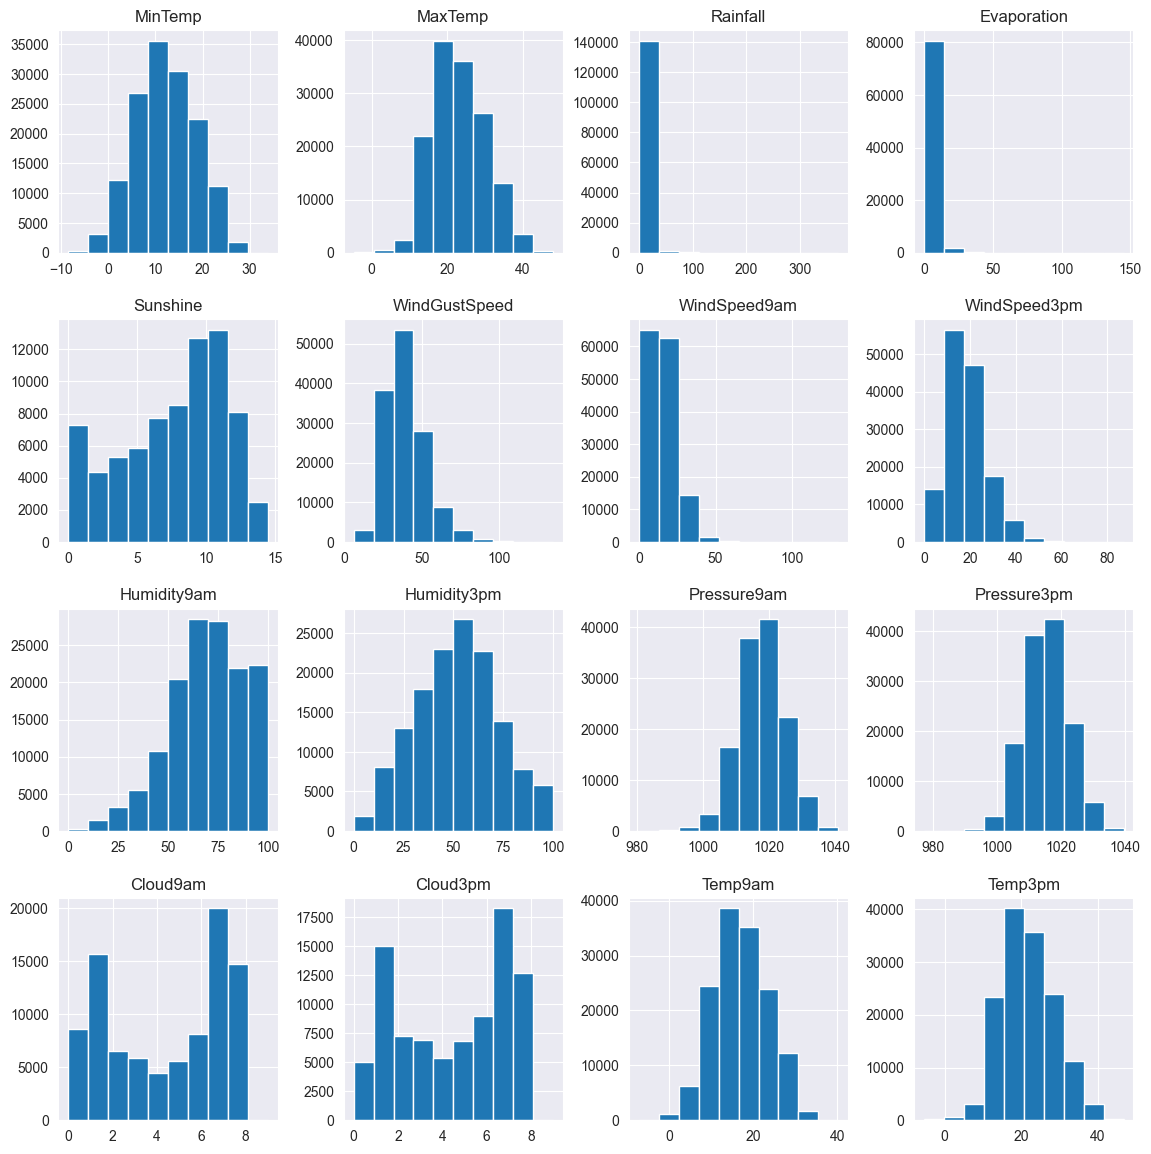

In [10]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
dataFrameWeather.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

# Data cleaning e Pre-processing

Inizio con il riempimento dei dati nan. Parto con 'MinTemp' e 'MaxTemp'. Essendo pochi i dati mancanti, essi verranno sostituiti con la temperatura media di ciascuna colonna.

In [11]:
mean_MinTemp = dataFrameWeather['MinTemp'].mean()
mean_MaxTemp = dataFrameWeather['MaxTemp'].mean()

dataFrameWeather['MinTemp'].fillna(mean_MinTemp, inplace=True)
dataFrameWeather['MaxTemp'].fillna(mean_MaxTemp, inplace=True)

In [12]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Andiamo ora a gestire il dato Rainfall. Esso indica se la quantità di acqua caduta in un giorno 'RainToday' = 'Yes' se e solo se la quantità di acqua caduta è strettamente maggiore di 1mm di acqua.

Si decide di droppare le tuple che contengono valori NaN in quanto la correzione richiederebbe troppo tempo per essere implementata visto il numero esiguo di tuple

Si decide di droppare le colonne 'WindDir3pm' and 'WindDir9pm' perchè risultano essere irrilevanti ed essere una specifica di una colonna già esistente. Stessa cosa con 'WindSpeed9am', 'WinSpeed3pm'

In [13]:
dataFrameWeather = dataFrameWeather.drop(columns=['WindDir3pm', 'WindDir9am', 'WindSpeed3pm', 'WindSpeed9am'], axis=1)
dataFrameWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  Cloud9am       89572 non-null   float64
 14  Cloud3pm       86102 non-null   float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

Posso, inoltre, droppare le tuple mancanti nella colonna 'RainTomorrow' essendo di un numero molto esiguo ed essendo questo il parametro che vogliamo andare a predire

In [14]:
dataFrameWeather.dropna(subset='Rainfall', inplace=True)
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      60488
Sunshine         67820
WindGustDir       9725
WindGustSpeed     9665
Humidity9am       1554
Humidity3pm       3630
Pressure9am      13940
Pressure3pm      13993
Cloud9am         53331
Cloud3pm         56874
Temp9am            685
Temp3pm           2746
RainToday            0
RainTomorrow      1412
dtype: int64

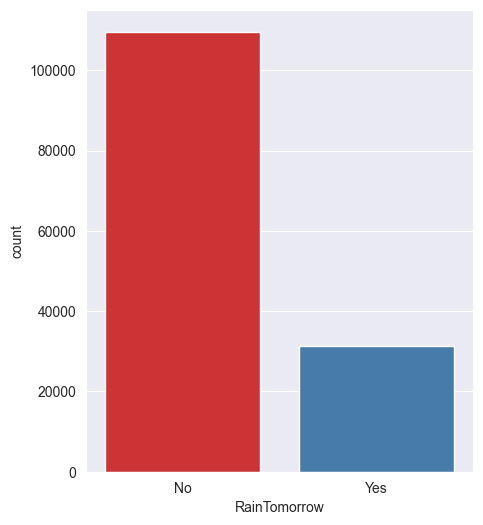

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   Humidity9am    139270 non-null  float64
 10  Humidity3pm    137286 non-null  float64
 11  Pressure9am    127044 non-null  float64
 12  Pressure3pm    127018 non-null  float64
 13  Cloud9am       88162 non-null   float64
 14  Cloud3pm       84693 non-null   float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-nul

In [15]:
dataFrameWeather.dropna(subset='RainTomorrow', inplace=True)
plt.figure(figsize=(5,6))
ax = sb.countplot(x='RainTomorrow', data=dataFrameWeather, palette="Set1")
plt.show()
dataFrameWeather.info()

Si continua con la sostituizione ai valori nan delle colonne 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm'. Qui si andrà ad effettuare una group-by sull'attributo 'RainToday', così da poter differenziare la media calcolata per giorni in cui piove e per giorni in cui non piove.

In [16]:
average_humidity = dataFrameWeather.groupby('RainToday')['Humidity9am'].transform('mean')
average_humidity2 = dataFrameWeather.groupby('RainToday')['Humidity3pm'].transform('mean')
average_temp = dataFrameWeather.groupby('RainToday')['Temp9am'].transform('mean')
average_temp2 = dataFrameWeather.groupby('RainToday')['Temp3pm'].transform('mean')
dataFrameWeather['Humidity9am'].fillna(average_humidity, inplace=True)
dataFrameWeather['Humidity3pm'].fillna(average_humidity2, inplace=True)
dataFrameWeather['Temp9am'].fillna(average_temp, inplace=True)
dataFrameWeather['Temp3pm'].fillna(average_temp2, inplace=True)

In [17]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Text(0, 0.5, 'RainTomorrow')

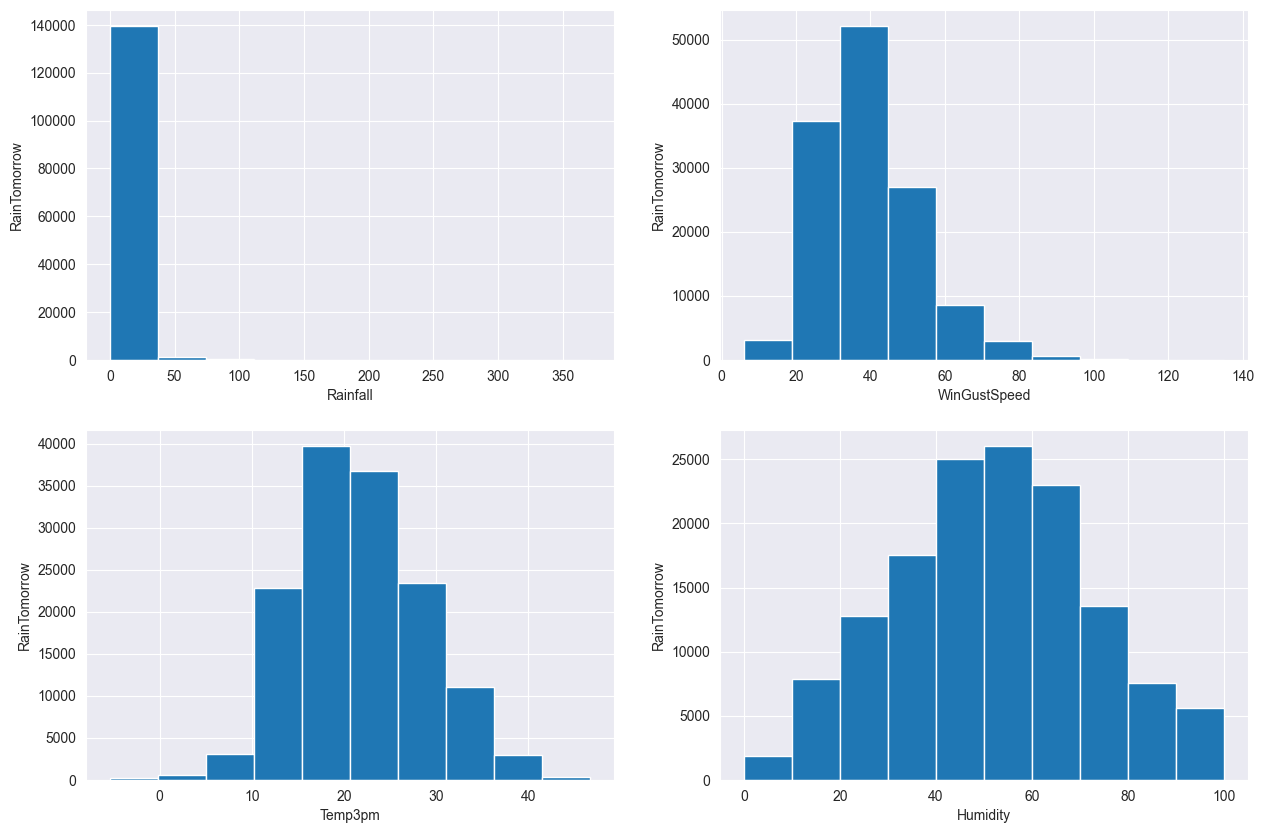

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrameWeather.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = dataFrameWeather.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WinGustSpeed')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = dataFrameWeather.Temp3pm.hist(bins=10)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = dataFrameWeather.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity')
fig.set_ylabel('RainTomorrow')

Si decide di droppare le colonne Evaporation e Sunshine in quanto sono quelle con la più bassa correlazione con gli altri attributi

In [19]:
dataFrameWeather = dataFrameWeather.drop(columns=['Evaporation', 'Sunshine'], axis=1)
dataFrameWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   Humidity9am    140787 non-null  float64
 8   Humidity3pm    140787 non-null  float64
 9   Pressure9am    127044 non-null  float64
 10  Pressure3pm    127018 non-null  float64
 11  Cloud9am       88162 non-null   float64
 12  Cloud3pm       84693 non-null   float64
 13  Temp9am        140787 non-null  float64
 14  Temp3pm        140787 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RainTomorrow   140787 non-null  object 
dtypes: float64(12), object(5)
mem

In [20]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Trasformo, a questo punto, la data dal formato gg-mm-aaaa in tre colonne diverse contenenti il giorno, il mese e l'anno. Questa soluzione sarà utile in seguito per fare imputation

In [21]:
df_copy = dataFrameWeather.copy()
# Aggiungo la colonna "month" al dataframe
df_copy['day'] = df_copy.Date.str.split("-", expand = True)[0]
df_copy['month'] = df_copy.Date.str.split("-", expand = True)[1]
# Aggiungo la colonna "year" al dataframe
df_copy['year'] = df_copy.Date.str.split("-", expand = True)[2]
df_copy = df_copy.drop(columns='Date', axis=1)

In [22]:
df_copy.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
day                  0
month                0
year                 0
dtype: int64

In [23]:
df_num = df_copy.select_dtypes(include=[np.number])
df_cat = df_copy.select_dtypes(include=['object'])

Uso un encoder per trasformare i dati categorici in dati numerici automaticamente

In [24]:
df_encoded = pd.concat([df_cat, df_num], axis=1)
for attr in df_encoded.columns:
    df_encoded[attr] = LabelEncoder().fit_transform(df_encoded[attr])
df_encoded.head()

Location  WindGustDir  RainToday  RainTomorrow  day  month  year  MinTemp  \
0         2           13          0             0    1     11     0      214   
1         2           14          0             0    1     11     1      153   
2         2           15          0             0    1     11     2      209   
3         2            4          0             0    1     11     3      171   
4         2           13          0             0    1     11     4      255   

   MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0      260         6             21           72           22          214   
1      283         0             21           44           25          243   
2      289         0             22           38           30          213   
3      312         0             10           45           16          313   
4      355        10             19           84           33          245   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          231         8        10      224      262  
1          238        10        10      227      288  
2          247        10         2      266      277  
3          289        10        10      237      310  
4          220         7         8      234      342

Data l'elevato numero di tuple nan rimanenti nelle colonne si è deciso di utilizzare un **imputer**. Un **imputer** è una tecnica utilizzata nella fase di preprocessing dei dati per gestire i valori mancanti in un dataset. L'imputer viene utilizzato per riempire i valori mancanti con valori appropriati in base alle caratteristiche dei dati.

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df_encoded) #imputation dei valori mancanti
df_imputed = pd.DataFrame(df_encoded, columns=df_copy.columns) #conversione in dataframe pandas
df_imputed.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

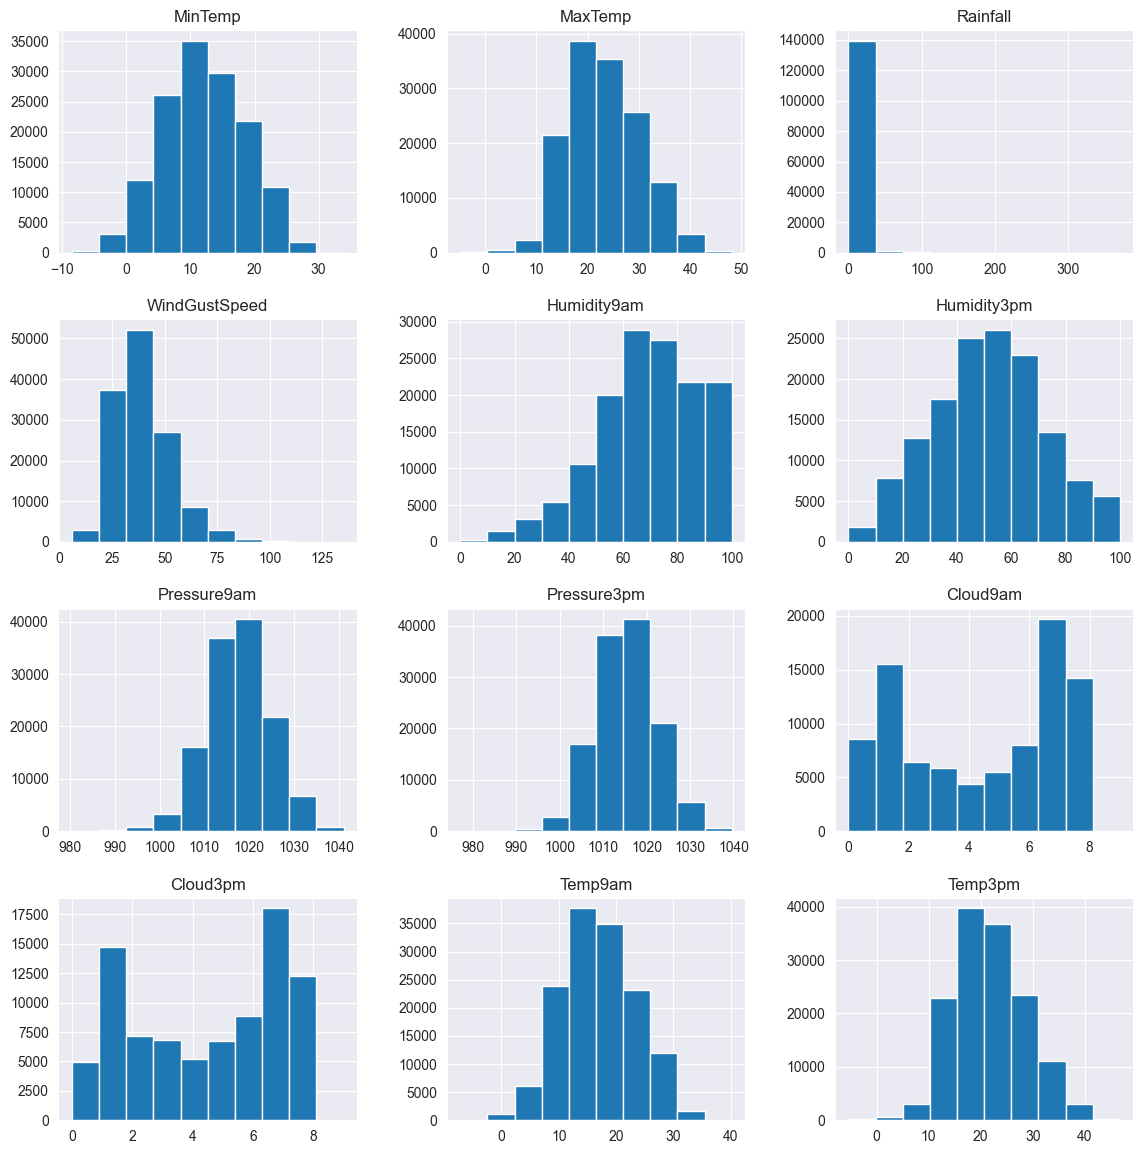

In [26]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
dataFrameWeather.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

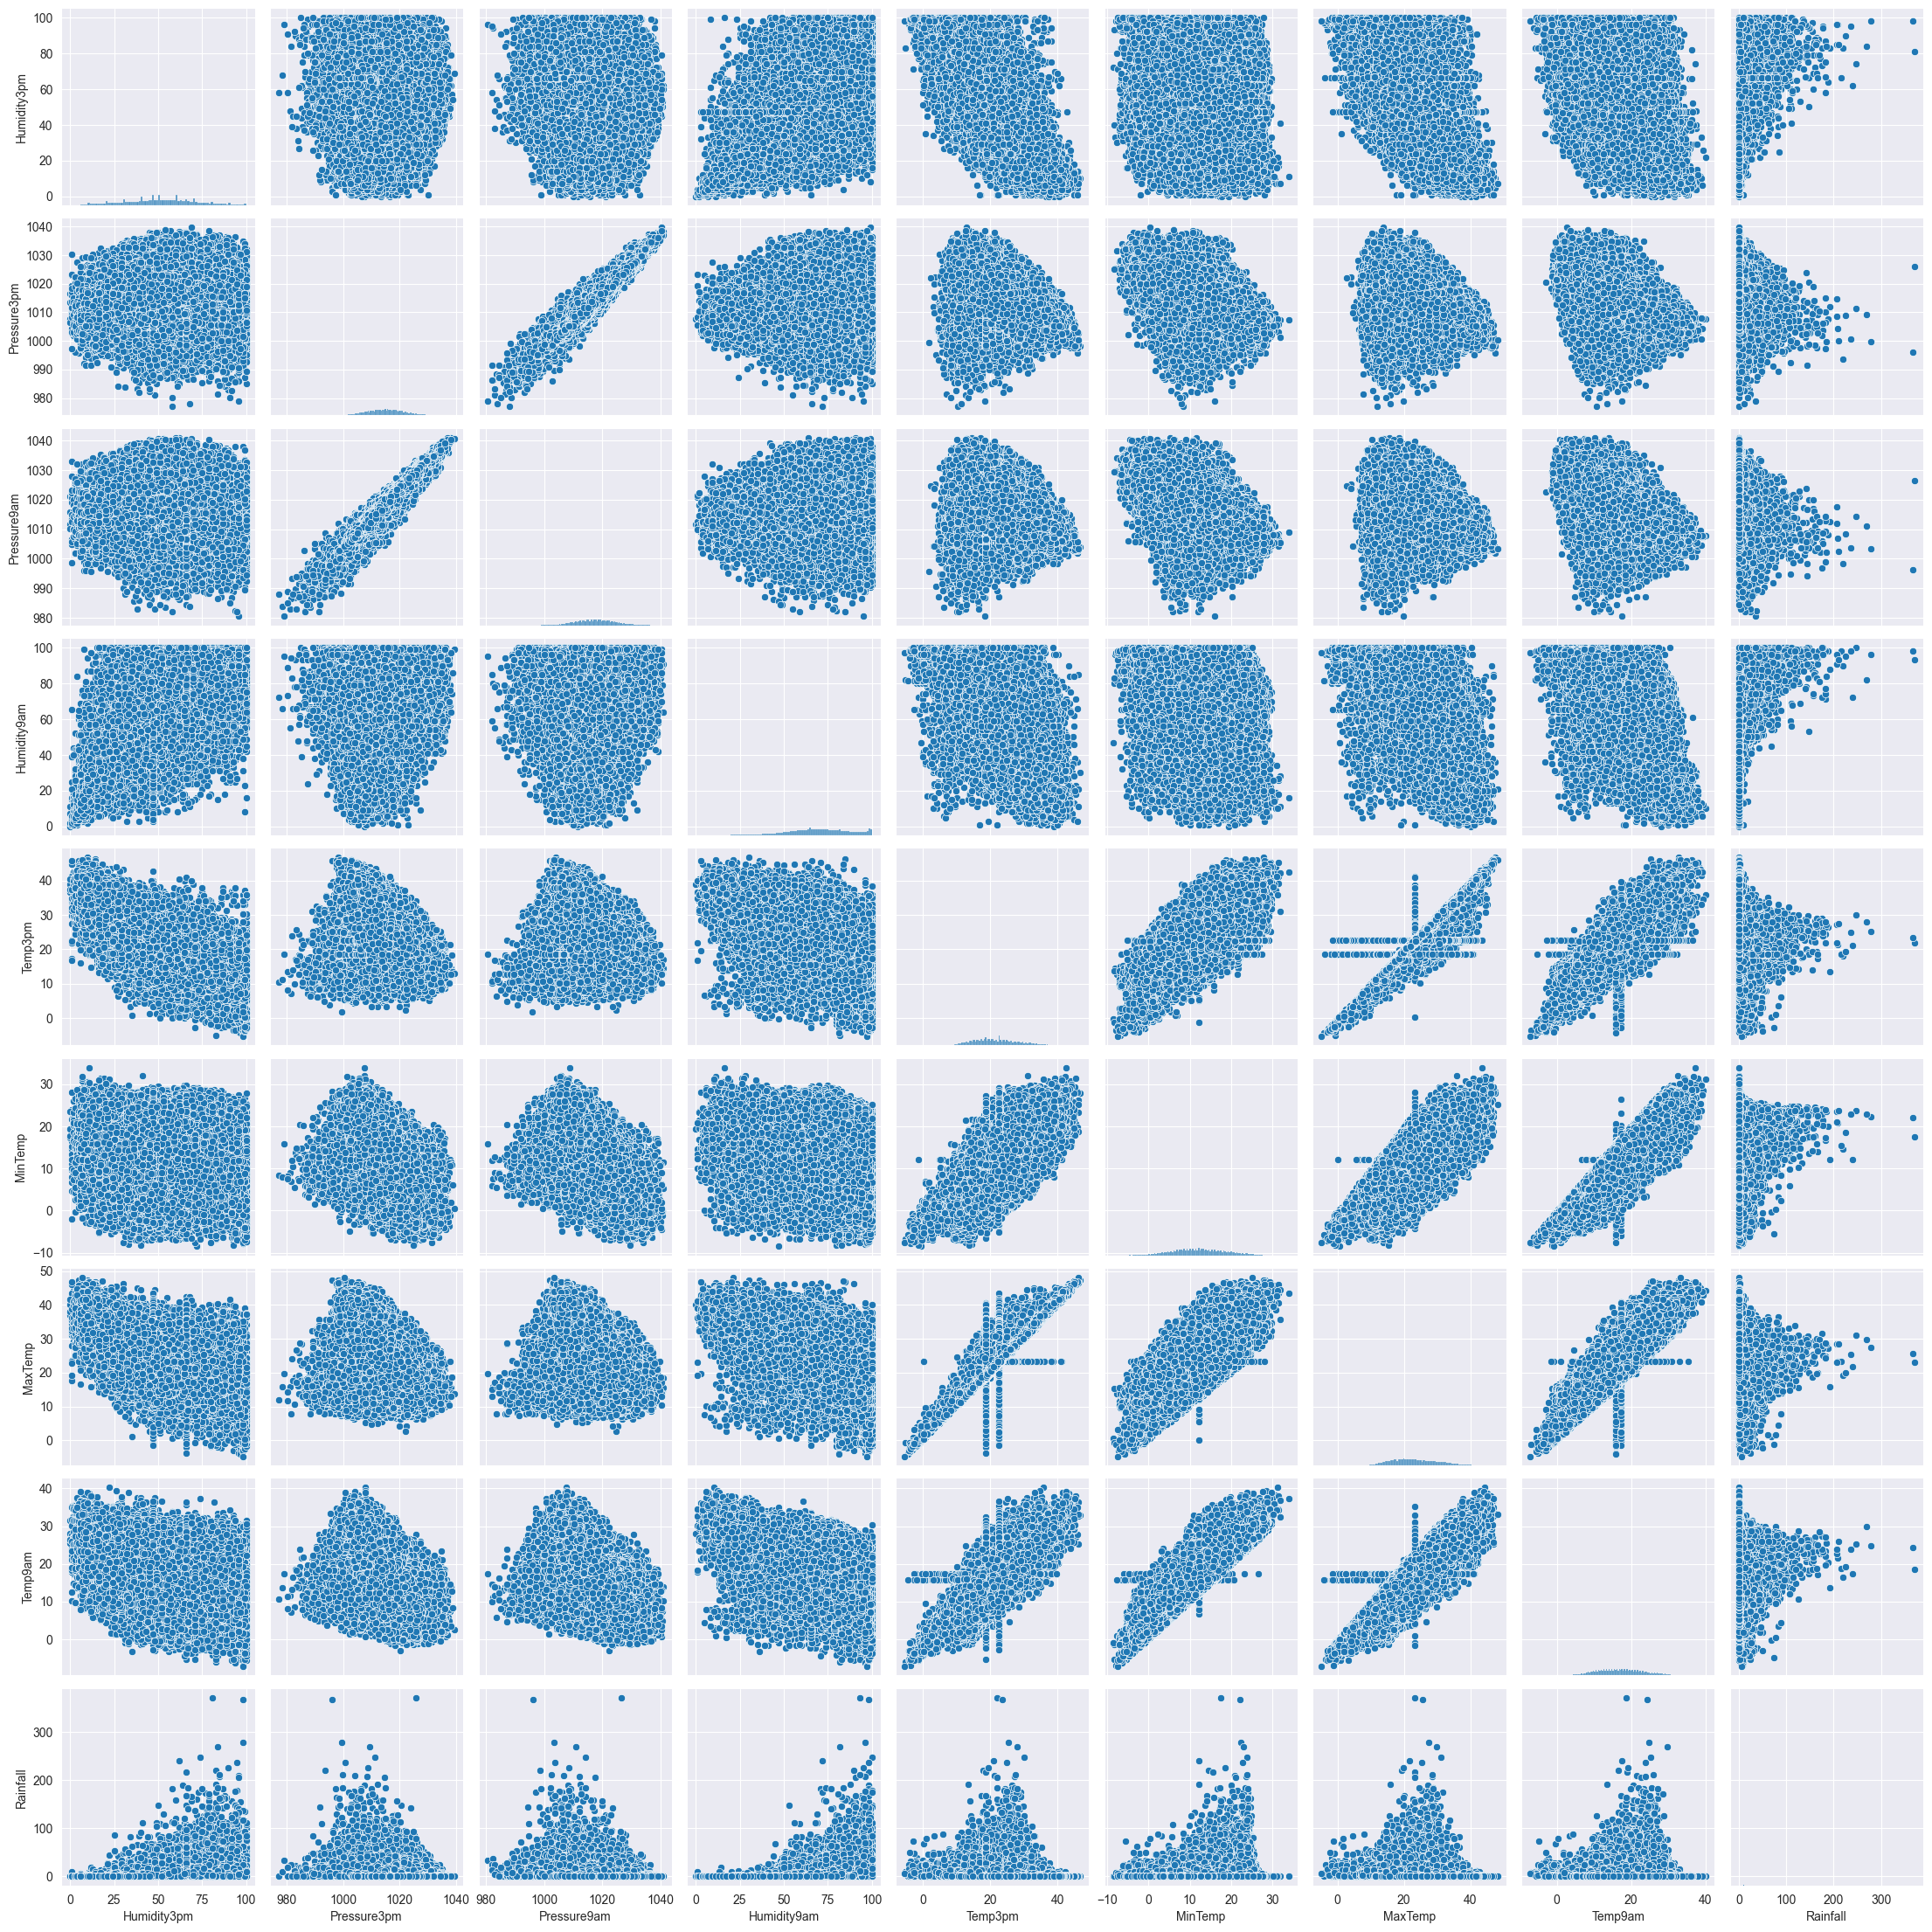

In [52]:
num = ['Humidity3pm','Pressure3pm', 'Pressure9am', 'Humidity9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Temp9am', 'Rainfall']
sb.pairplot(dataFrameWeather[num], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

# Correlazione e importanza delle features
Plotto la matrice di correlazione servendoci di una heatmap per capire il grado di correlazione tra i vari dati

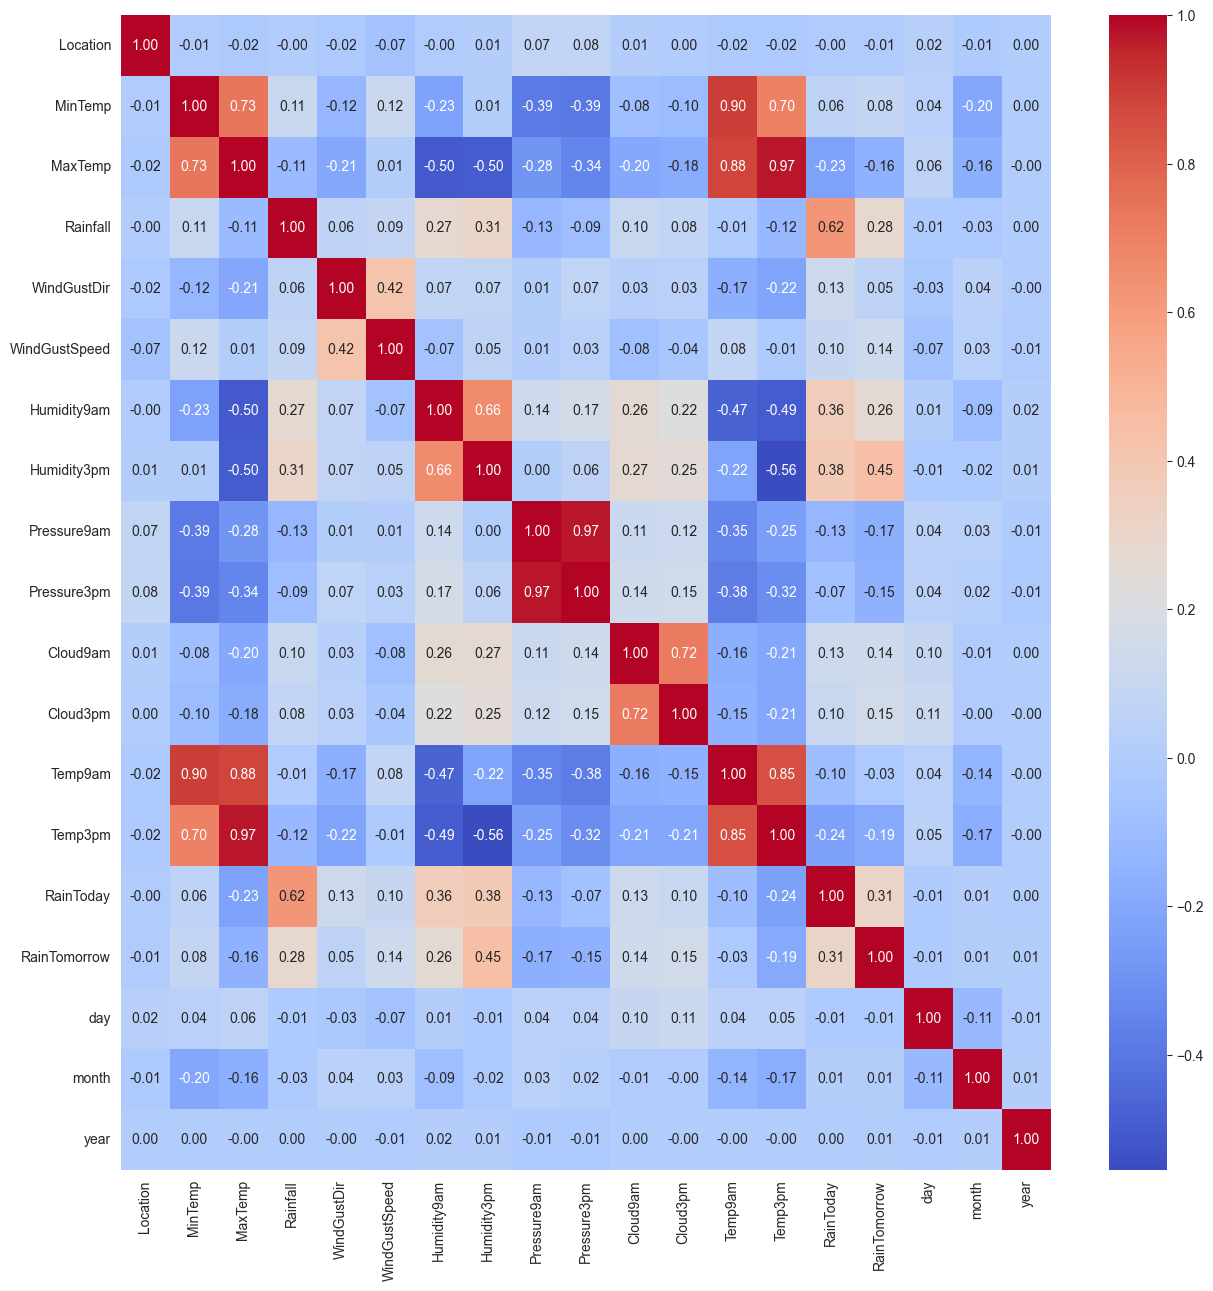

In [28]:
#creo la matrice di correlazione
matr_corr = df_imputed.corr()

#stampo la matrice di correlazione
plt.figure(figsize=(15,15))
sb.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Da una veloce analisi della matrice di correlazione possiamo notare come alcuni attributi sono bassamente correlati agli altri. Questo ci permette di dropparli senza problemi così da ridurre il numero di features da tenere in considerazione

In [29]:
df_imputed = df_imputed.drop(columns=['year', 'month', 'day', 'WindGustDir', 'WindGustSpeed', 'Location'])

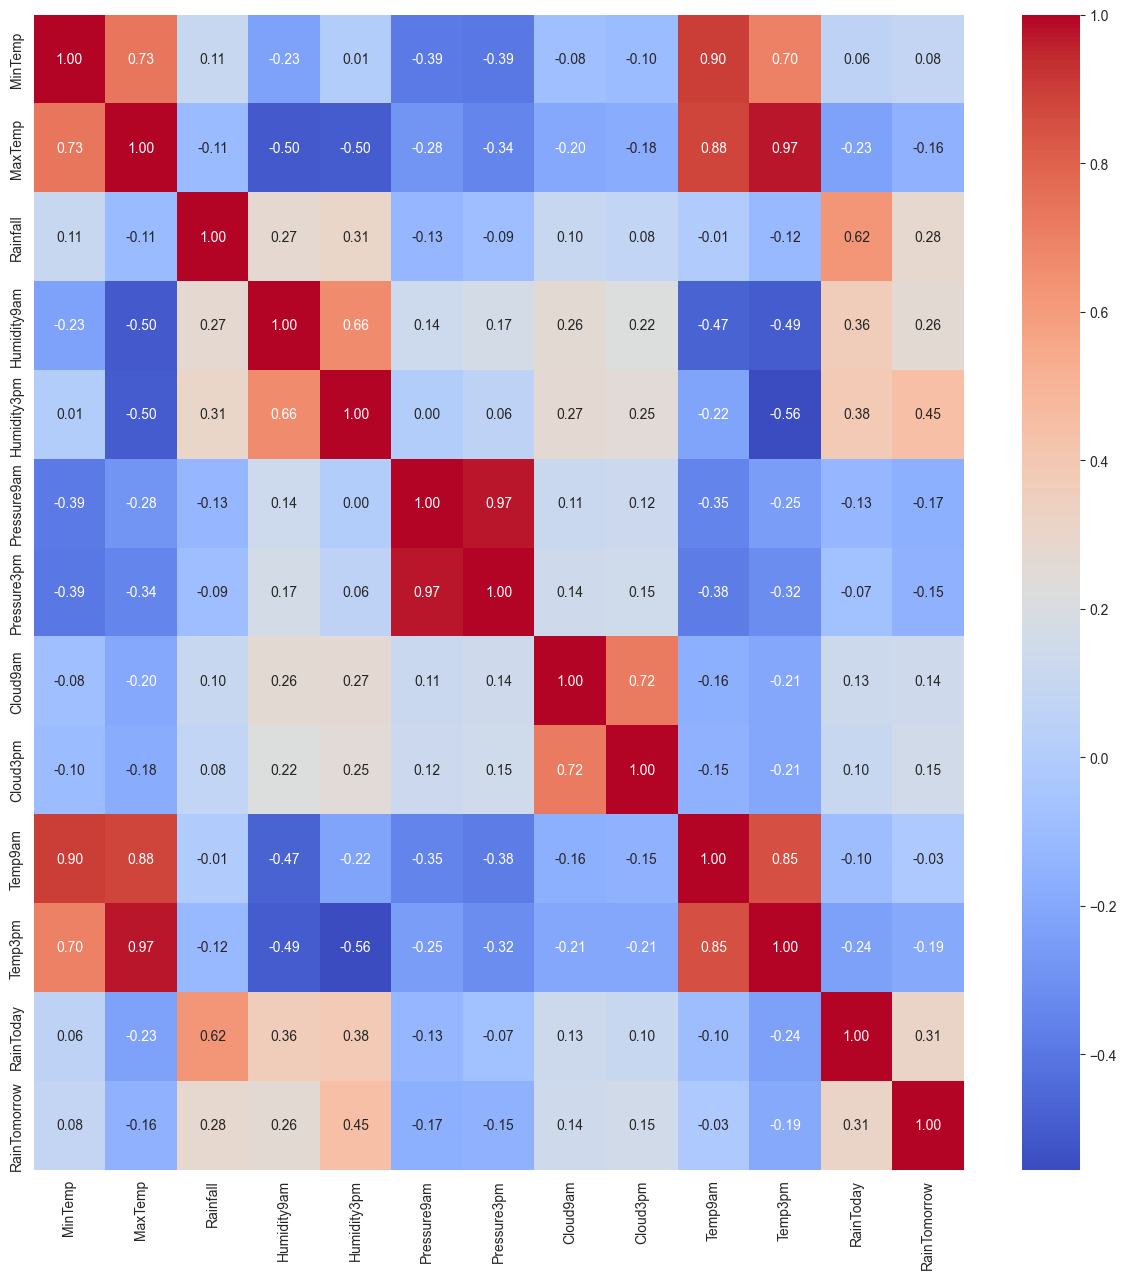

In [30]:
#creo la matrice di correlazione
matr_corr = df_imputed.corr()

#stampo la matrice di correlazione
plt.figure(figsize=(15,15))
sb.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Andiamo adesso a studiare l'importanza delle feature. Sappiamo di voler fare predizione sull'attributo 'RainTomorrow', andiamo quindi a creare un RandomForest che ci permetterà di capire quali sono gli attributi più importanti a riguardo.

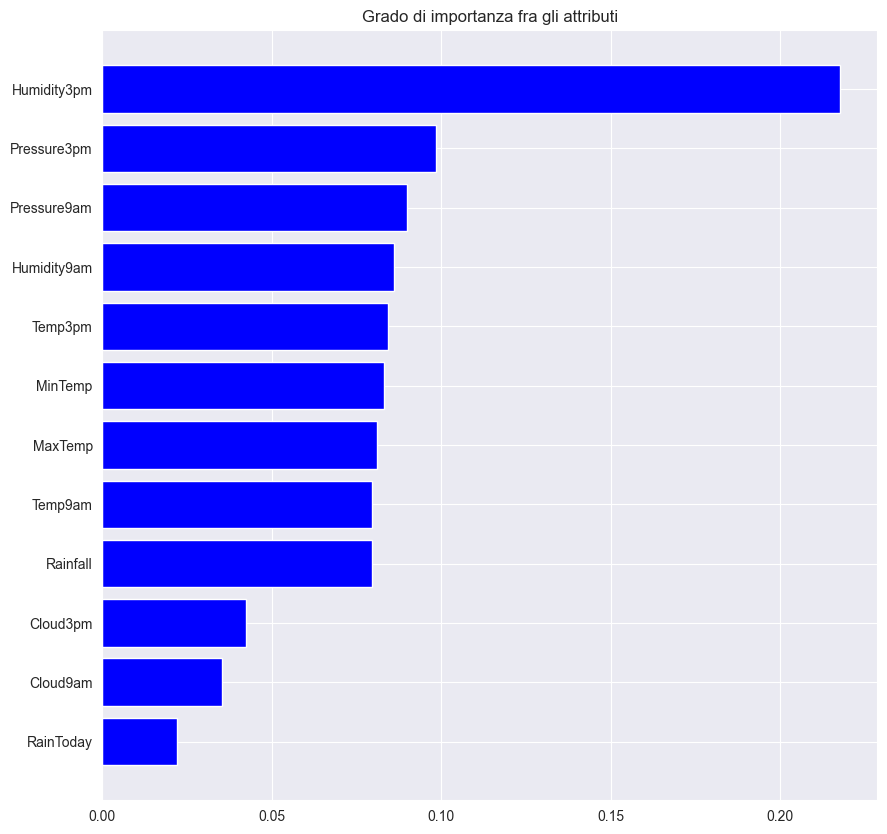

In [31]:
df_X = df_imputed.drop('RainTomorrow', axis=1)
df_y = df_imputed['RainTomorrow']

forest = RandomForestClassifier()
forest.fit(df_X, df_y)

attr = df_X.columns
importances = forest.feature_importances_ #grado di importanza delle features
index = np.argsort(importances) #mappa ogni grado di importanza con l'attributo corrispondente

plt.figure(figsize=(10,10))
plt.title('Grado di importanza fra gli attributi')
plt.barh(range(len(index)),importances[index],color='b',align='center')
plt.yticks(range(len(index)),attr[index])
plt.show()

In [53]:
df_imputed.drop(['RainToday', 'Cloud3pm', 'Cloud9am', 'Rainfall', 'Temp3pm'], axis=1)

MinTemp  MaxTemp  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           214      260           72           22          214          231   
1           153      283           44           25          243          238   
2           209      289           38           30          213          247   
3           171      312           45           16          313          289   
4           255      355           84           33          245          220   
...         ...      ...          ...          ...          ...          ...   
145454      114      249           59           27          384          374   
145455      107      266           51           24          383          365   
145456      115      285           56           21          372          353   
145457      133      301           53           24          347          330   
145458      157      302           51           24          331          326   

        Temp9am  RainTomorrow  
0           224             0  
1           227             0  
2           266             0  
3           237             0  
4           234             0  
...         ...           ...  
145454      148             0  
145455      155             0  
145456      163             0  
145457      179             0  
145458      205             0  

[140787 rows x 8 columns]

# Bilanciamento del dataset

Per poter proseguire con i primi classificatori bisogna prima bilanciare il dataset. In particolare l'attributo 'RainTomorrow' sulla quale bisogna fare predizione risulta essere molto sbilanciato da come si può vedere dal grafico sottostante

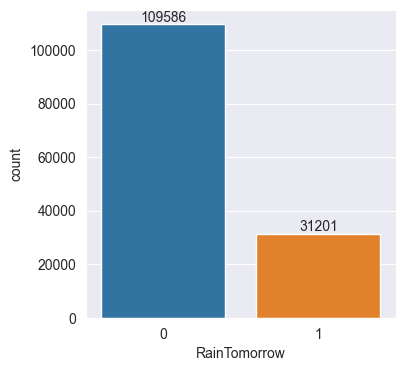

In [54]:
plt.figure(figsize=(4, 4))
ax = sb.countplot(x=df_imputed['RainTomorrow'])
plt.bar_label(ax.containers[0])
plt.show()

Ciò che verrà fatto è quello di utilizzare il sampling, in particolare verrà fatto oversampling sui dati per bilanciarli

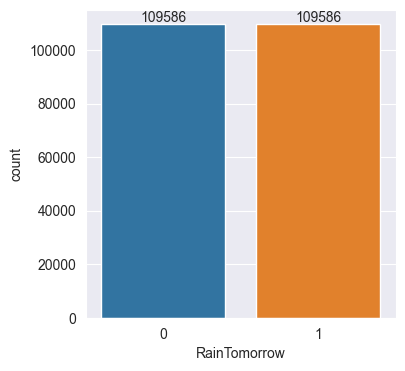

In [55]:
X = df_imputed.drop(['RainTomorrow'], axis=1)
y = df_imputed['RainTomorrow']

#Utilizzo lo smote per fare oversampling e aumentare il numero di istanze 'RainTomorrow' = 'Yes' (1)
smote = SMOTE(random_state=35)
X_smoted, y_smoted = smote.fit_resample(X,y)
df_balanced = pd.concat([X_smoted, y_smoted],axis=1)

plt.figure(figsize=(4, 4))
ax = sb.countplot(x=df_balanced['RainTomorrow'])
plt.bar_label(ax.containers[0])
plt.show()

In [56]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219172 entries, 0 to 219171
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   MinTemp       219172 non-null  int64
 1   MaxTemp       219172 non-null  int64
 2   Rainfall      219172 non-null  int64
 3   Humidity9am   219172 non-null  int64
 4   Humidity3pm   219172 non-null  int64
 5   Pressure9am   219172 non-null  int64
 6   Pressure3pm   219172 non-null  int64
 7   Cloud9am      219172 non-null  int64
 8   Cloud3pm      219172 non-null  int64
 9   Temp9am       219172 non-null  int64
 10  Temp3pm       219172 non-null  int64
 11  RainToday     219172 non-null  int32
 12  RainTomorrow  219172 non-null  int32
dtypes: int32(2), int64(11)
memory usage: 20.1 MB


# Campionamento
Visto l'elevatissimo numero di tuple si decide di fare campionamento sul dataframe così da poter lavorare con un numero di tuple minore

In [57]:
df_balanced_sampled = df_balanced.sample(n = 124110, random_state=35) #n e random_state sono dei numeri generati casualmente

In [58]:
df_balanced_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124110 entries, 201454 to 159642
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   MinTemp       124110 non-null  int64
 1   MaxTemp       124110 non-null  int64
 2   Rainfall      124110 non-null  int64
 3   Humidity9am   124110 non-null  int64
 4   Humidity3pm   124110 non-null  int64
 5   Pressure9am   124110 non-null  int64
 6   Pressure3pm   124110 non-null  int64
 7   Cloud9am      124110 non-null  int64
 8   Cloud3pm      124110 non-null  int64
 9   Temp9am       124110 non-null  int64
 10  Temp3pm       124110 non-null  int64
 11  RainToday     124110 non-null  int32
 12  RainTomorrow  124110 non-null  int32
dtypes: int32(2), int64(11)
memory usage: 12.3 MB


In [59]:
df_balanced_sampled.shape

(124110, 13)

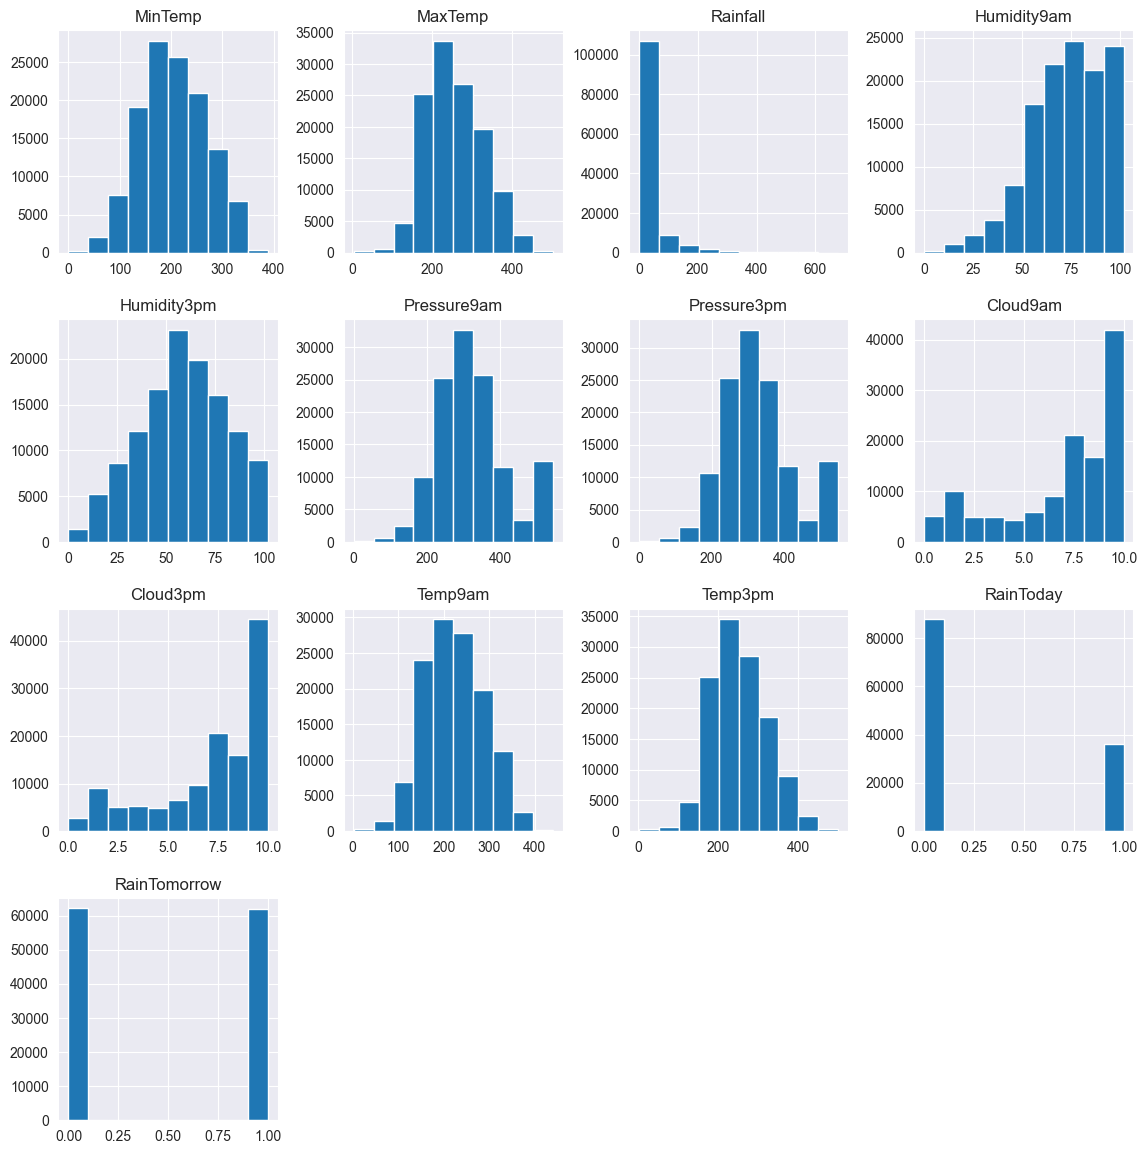

In [60]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
df_balanced_sampled.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

In [61]:
df_balanced_sampled.to_csv('df_final.csv', index=False)

# Classificatori

In [62]:
df_final = pd.read_csv('df_final.csv')

Finito il lavoro di pulizia, bilanciamento ed esplorazione del dataset si può passare alla fase di training dei classificatori. Dividiamo il dataset in **training_set** e **test_set**
* training_set utilizzato per costruire il modello che sarà formato dai 2/3 ddel dataset
* test_set, utilizzato per testare le performance del modello e sarà composto dalla restante parte del dataset

In [63]:
#Divido il dataset in test_set e training_set
df_X = df_final.drop('RainTomorrow', axis=1)
df_y = df_final['RainTomorrow']

X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size=.33, random_state=42)
y_train = y_train.values.ravel()

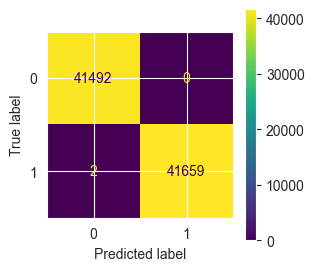

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41492
           1       1.00      1.00      1.00     41661

    accuracy                           1.00     83153
   macro avg       1.00      1.00      1.00     83153
weighted avg       1.00      1.00      1.00     83153



In [64]:
albero = DecisionTreeClassifier(random_state=42)
albero = albero.fit(X_train,y_train)
y_pred_train_albero = albero.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_albero)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_albero))

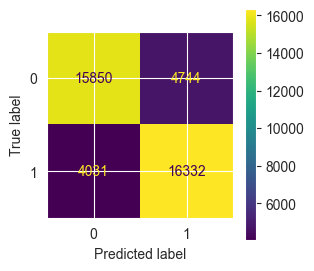

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     20594
           1       0.77      0.80      0.79     20363

    accuracy                           0.79     40957
   macro avg       0.79      0.79      0.79     40957
weighted avg       0.79      0.79      0.79     40957



In [65]:
y_pred_test_albero=albero.predict(X_test)
#lista_predizioni.append(y_pred_test_albero)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_albero)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_albero))

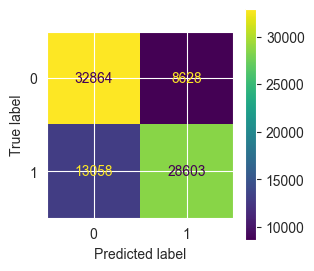

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     41492
           1       0.77      0.69      0.73     41661

    accuracy                           0.74     83153
   macro avg       0.74      0.74      0.74     83153
weighted avg       0.74      0.74      0.74     83153



In [66]:
nb_clf = GaussianNB()
nb_clf = nb_clf.fit(X_train, y_train)
y_pred_train_bayes = nb_clf.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_bayes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_bayes))

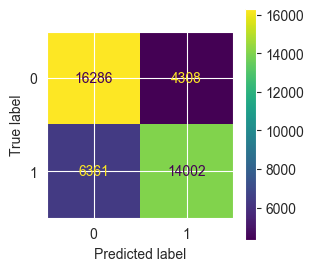

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     20594
           1       0.76      0.69      0.72     20363

    accuracy                           0.74     40957
   macro avg       0.74      0.74      0.74     40957
weighted avg       0.74      0.74      0.74     40957



In [67]:
y_pred_test_bayes = nb_clf.predict(X_test)
#lista_predizioni.append(y_pred_test_bayes)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_bayes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_bayes))

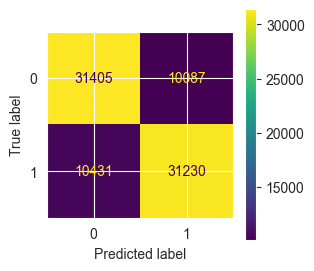

              precision    recall  f1-score   support

           0       0.75      0.76      0.75     41492
           1       0.76      0.75      0.75     41661

    accuracy                           0.75     83153
   macro avg       0.75      0.75      0.75     83153
weighted avg       0.75      0.75      0.75     83153



In [68]:
logreg_clf = LogisticRegression(random_state=42,max_iter=5000) #aumento iterazioni per la convergenza dell'algoritmo
logreg_clf = logreg_clf.fit(X_train, y_train)
y_pred_train_logreg_clf = logreg_clf.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_logreg_clf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_logreg_clf))

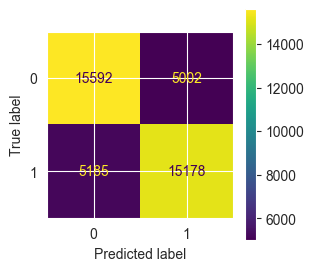

              precision    recall  f1-score   support

           0       0.75      0.76      0.75     20594
           1       0.75      0.75      0.75     20363

    accuracy                           0.75     40957
   macro avg       0.75      0.75      0.75     40957
weighted avg       0.75      0.75      0.75     40957



In [69]:
y_pred_test_logreg_clf = logreg_clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_logreg_clf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_logreg_clf))